In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
%%javascript
let words = 0;
Jupyter.notebook.get_cells().forEach(cell => {if (cell.cell_type == "markdown") { words += cell.element[0].innerText.split(" ").length }})
element.text("markdown words: " + words)

<IPython.core.display.Javascript object>

In [3]:
sns.set()
# sns.reset_orig()

# An Exploration into Classic Hollywood

<tr>
<td> <img src="headshots/humphrey_bogart.jpg" width="200"/> </td> 
<td> <img src="headshots/katharine_hepburn.jpg" width="200"/> </td> 
<td> <img src="headshots/cary_grant.jpg" width="200"/> </td> 
<td> <img src="headshots/bette_davis.jpg" width="200"/> </td> 
</tr>

<!--[Humphrey Bogart](https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Stars#/media/File:Humphrey_Bogart_1940.jpg), [Katharine Hepburn](https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Stars#/media/File:Katharine_Hepburn_promo_pic.jpg), [Cary Grant](https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Stars#/media/File:Grant,_Cary_(Suspicion)_01_Crisco_edit.jpg), [Bette Davis](https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Stars#/media/File:Bette_Davis_-_portrait.jpg)-->

## Introduction

#### Context & Questions

I grew up watching classic films from the mid-20$^{th}$ century and have a great interest in investigating theories I maintained over the years. When creating this dataset I was driven by many questions - How have genres changed in popularity over the past century? What do the main stars of the century's careers look like? How were men and women cast and treated in Classic Hollywood? How was a specific actor's career shaped with respect to a frequent co-star? I was interested in conducting an exploratory analysis on all the information I could gather with respect to this time in Hollywood and seeing what trends I could discover within the data.

#### Findings

- The Comedy genre has a decrease in films made following WWII of ~300, but this is the only genre that reflects the impact of major world events. 

- The top 4 most popular genres are Drama, Comedy, Action, and Crime. Number of votes has no correlation with average rating, except when there is an immense number of votes. If there are more than 100,000 votes on a movie, the average rating is moderately postively correlated with Drama and Action by coefficients of 0.565 and 0.535 respectively. There was only a correlation of 0.388 relating to Comedy films, but the correlation coefficient for Crime films with over 100,000 ratings was 0.702.

- Male actors see a dip in productivity around 60 years old, whereas women experience this around 40. Similarly all the men on this list started after the age of 20, whereas the youngest female on this list started at age 4 (Shirley Temple).

- The number of films actors in Classic Hollywood made each year was moderately correlated (correlation coefficients of 0.4-0.6) with actors of the same gender and similar age. 

- Average movie runtime is strongly positively correlated with an increase in year with a Pearson correlation coefficient of 0.826, and Spearman correlation of 0.901. Average movie runtime increased by 30 seconds every year over the past century.

## Data Description 

#### Observations

There are three datasets below that contain important information that pertains to the analysis on Classic Hollywood presented below. The ```top25``` file contains information on the top 50 male and female screen legends in Hollywood (1900-2000) according to the American Film Institute. The observations in this table are actors and acctresses ranked among the top 25 in their respective genders. The attributes relating to each actor are the year of birth and death, primary profession (actor, director, producer), ranking on the list, and top 4 movies for which each actor is known. 

The ```century``` file has information on every film made in the past century. The observations are movies, and the  attributes are a unique identifier (tconst), information relating to the title (alternative names, title type), run-time, year the film was made, genres of the film, average rating (according to IMDB), and the number of votes taken into account. Lastly, the ```principals``` table contains information on the main cast and crew members for each movie made in the past decade. Each observation is a movie, and the corresponding attributes are the individuals associated with the movie and the role each individual had (actor, director).

It was necessary to have 3 separate tables for this project to organize the data in the most efficient way possible. The screen legends needed their own table that had information that just pertained to them. The ```top25``` table then had manageable numbers to be merged with the other two tables (movies from the century and main cast and crew) to find all the relevant information on their movie careers. Additionally, the observations are two different entities - actors vs. movies. There is no logical way in which the two could be included in one single table. Similarly, the ```movies``` table needed to be kept separate from the ```principals``` cast and crew table, as the principal cast and crew table has multiple entries for each movie, with a corresponding actor, director, or writer. It was necessary to keep this table with duplicated movie titles separate from the movies of the century, as duplicates would skew the calculations run on total movies made in the past century, movies of each genre, and movies of each genre made each year. All observations in all three tables have unique identifiers, under the columns ```nconst``` or ```tconst``` (corresponding to title constant and name constant), that allow for easy merging of the information in the three tables.

#### Dataset Creation

With respect to IMDB, the datasets created from the millions of records on the website were created for personal and non-commercial use. IMDB clarifies that information not present in the datasets is not available for public use. I assume that this information was generated to enable projects and studies like this one, as well as commercial use with permission. A database with as many records as IMDB hosts should be kept track of and explored frequently, as there is a great amount of content to be analyzed. The Wikipedia page was created after Wikipedia's founding in 2001, and an individual or a group of people thought it necessary for the American Film Institute to have an online presence. 

The datasets created from IMDB and Wikipedia were inspired, as explored in the introduction above, by my love of Classic Films. 

#### Funding

The data that constitutes this dataset was generated by IMDB.

#### Influences 

Potential influences on the data observed and recorded inclue the fact that average ratings do not reflect the reception at the time. Ratings on IMDB reflect the current reception. Both IMDB and Wikipedia are not guaranteed to be impartial. People are more likely to leave reviews when they are passionate about a film, this leaves the data from IMDB to reflect strong receptions and does not include moderate responses. Similarly, IMDB reports principal cast and crew according to its private standards. This could result in a misrepresentation of the number of films an individual had a part in if the role was not significant enough to be noted.  

#### Preprocessing

Raw data was collected from gsv files provided by IMDB at https://datasets.imdbws.com/. I used BeautifulSoup to gather the names and rankings of the greatest male and female actors from 1900-2000 according to the American Film Institue from Wikipedia (https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Stars). Once I had created a DataFrame of the top stars, I matched each name with a name in the data from IMDB, which provided the date of birth and death of each actor, and the top 4 movies for which each actor is known. After removing repetitive columns with overlapping information, I exported this to a csv file. This constitutes the ```top25``` table explored below.

I then combined the file that had general movie information with the file that contained the average rating of each film, and selected just the programs that were classified as movies. This resulted in the ```century``` table below which contains the title, year, rating, genre, and type of each film made in the last century.

Lastly, I combined the information on the principal cast and crew members with the table I created on all movies in the past century, to generate a comprehensive record of every film an actor had a part in during the last century.

#### People Involved

With regards to IMDB, the reviewers should have been aware that data was being collected, although they may have been unaware their reviews would generate this immense report. Reviewers expect responses to be collected by IMDB, it is a public website, but may have thought that their reviews would only go as far as the site. Now, as technology becomes more popular and people are more aware of constant data collection, most users probably expect this data to be collected for a report of this nature.

The members of the American Film Institute were aware their list of screen legends was recorded for viewing, reference, and analysis. 

#### Raw Source Data
- Source data can be found in my Github repository: https://github.coecis.cornell.edu/hp286/2950Final
    - the notebook ```data_collection.ipynb``` provides a walk-through of the data collection carried out for this project.
    - the IMDB files are too large to be uploaded to Github but are available at the link below.
- [IMDB information](https://datasets.imdbws.com/) 
- [Wikipedia Top 50 Screen Legends](https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Stars)

**Information courtesy of
IMDb
(http://www.imdb.com).
Used with permission.**

# Data analysis

In [4]:
#overview
top25 = pd.read_csv('top_actors_and_movies.csv')
century = pd.read_csv('century_movies.csv')
principals = pd.read_csv('century_principals.csv')

In [5]:
top25.sort_values(by='rank').head()

,Unnamed: 0,nconst,primaryName,birthYear,deathYear,primaryProfession,rank,knownFor1,knownFor2,knownFor3,knownFor4
3,6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer",1,tt0043265,tt0040897,tt0034583,tt0033870
17,135,nm0000031,Katharine Hepburn,1907,2003,"actress,soundtrack,writer",1,tt0032904,tt0043265,tt0082846,tt0063227
7,45,nm0000012,Bette Davis,1908,1989,"actress,soundtrack,make_up_department",2,tt0056687,tt0031210,tt0035140,tt0042192
14,126,nm0000026,Cary Grant,1904,1986,"actor,soundtrack,producer",2,tt0056923,tt0053125,tt0048728,tt0032599
30,201,nm0000071,James Stewart,1908,1997,"actor,soundtrack,director",3,tt0052561,tt0032904,tt0031679,tt0052357


In [6]:
century.head()

,Unnamed: 0,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genre1,genre2,genre3,averageRating,numVotes
0,0,tt0000335,movie,Soldiers of the Cross,1900,\N,Biography,Drama,NaN,6.1,40
1,1,tt0000574,movie,The Story of the Kelly Gang,1906,70,Biography,Crime,Drama,6.1,571
2,2,tt0000615,movie,Robbery Under Arms,1907,\N,Drama,NaN,NaN,4.5,15
3,3,tt0000630,movie,Hamlet,1908,\N,Drama,NaN,NaN,3.4,11
4,4,tt0000675,movie,Don Quijote,1908,\N,Drama,NaN,NaN,4.8,10


In [7]:
principals.head()

,Unnamed: 0,tconst,ordering,nconst,category,titleType,primaryTitle,startYear,runtimeMinutes,genre1,genre2,genre3
0,0,tt0000335,1,nm1010955,actress,movie,Soldiers of the Cross,1900,\N,Biography,Drama,NaN
1,1,tt0000335,2,nm1012612,actor,movie,Soldiers of the Cross,1900,\N,Biography,Drama,NaN
2,2,tt0000335,3,nm1011210,actor,movie,Soldiers of the Cross,1900,\N,Biography,Drama,NaN
3,3,tt0000335,4,nm1012621,actor,movie,Soldiers of the Cross,1900,\N,Biography,Drama,NaN
4,4,tt0000335,5,nm0095714,director,movie,Soldiers of the Cross,1900,\N,Biography,Drama,NaN


The total movies made by genre over the past 100 years is displayed below.

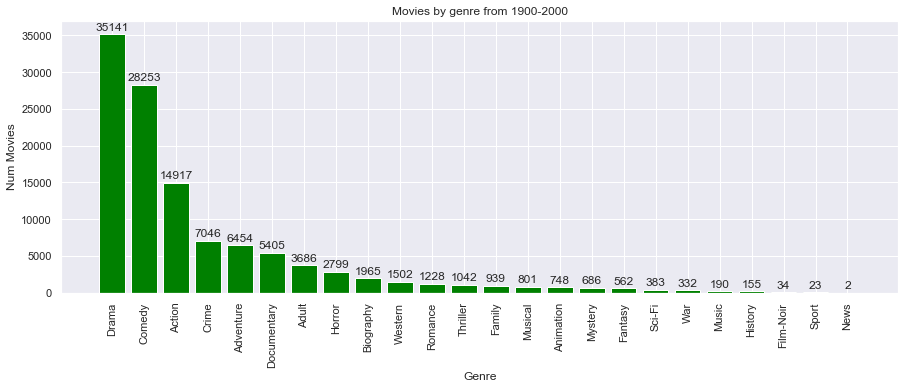

In [8]:
x = century['genre1'].value_counts().index
y = century['genre1'].value_counts()

plt.figure(figsize=(15,5))
plt.bar(x, y, color='green')
plt.ylim(0,37000)

for x,y in zip(x,y):
    plt.annotate(y, (x, y), xytext=(0, 2), textcoords="offset points", ha='center', va='bottom')
    
plt.title("Movies by genre from 1900-2000")
plt.xlabel('Genre')
plt.ylabel('Num Movies')
plt.xticks(rotation=90)
plt.show()

In [9]:
total = len(century['primaryTitle'].unique())
print("Total movies made in the twentieth century:", format(total, ','))

Total movies made in the twentieth century: 106,198


I grew up hearing that comedy movies were more popular during the Great Depression because people used cinema as an escape, and I am curious to see if this trend is reflected in the data, and if other genres have similar trends. 

The plots below show the number of films in each genre released each year. The graphs are plotted on the same axes to provide an accurate understanding of the number of films in respect to the other genres. 

In [10]:
all_genres = century['genre1'].unique()

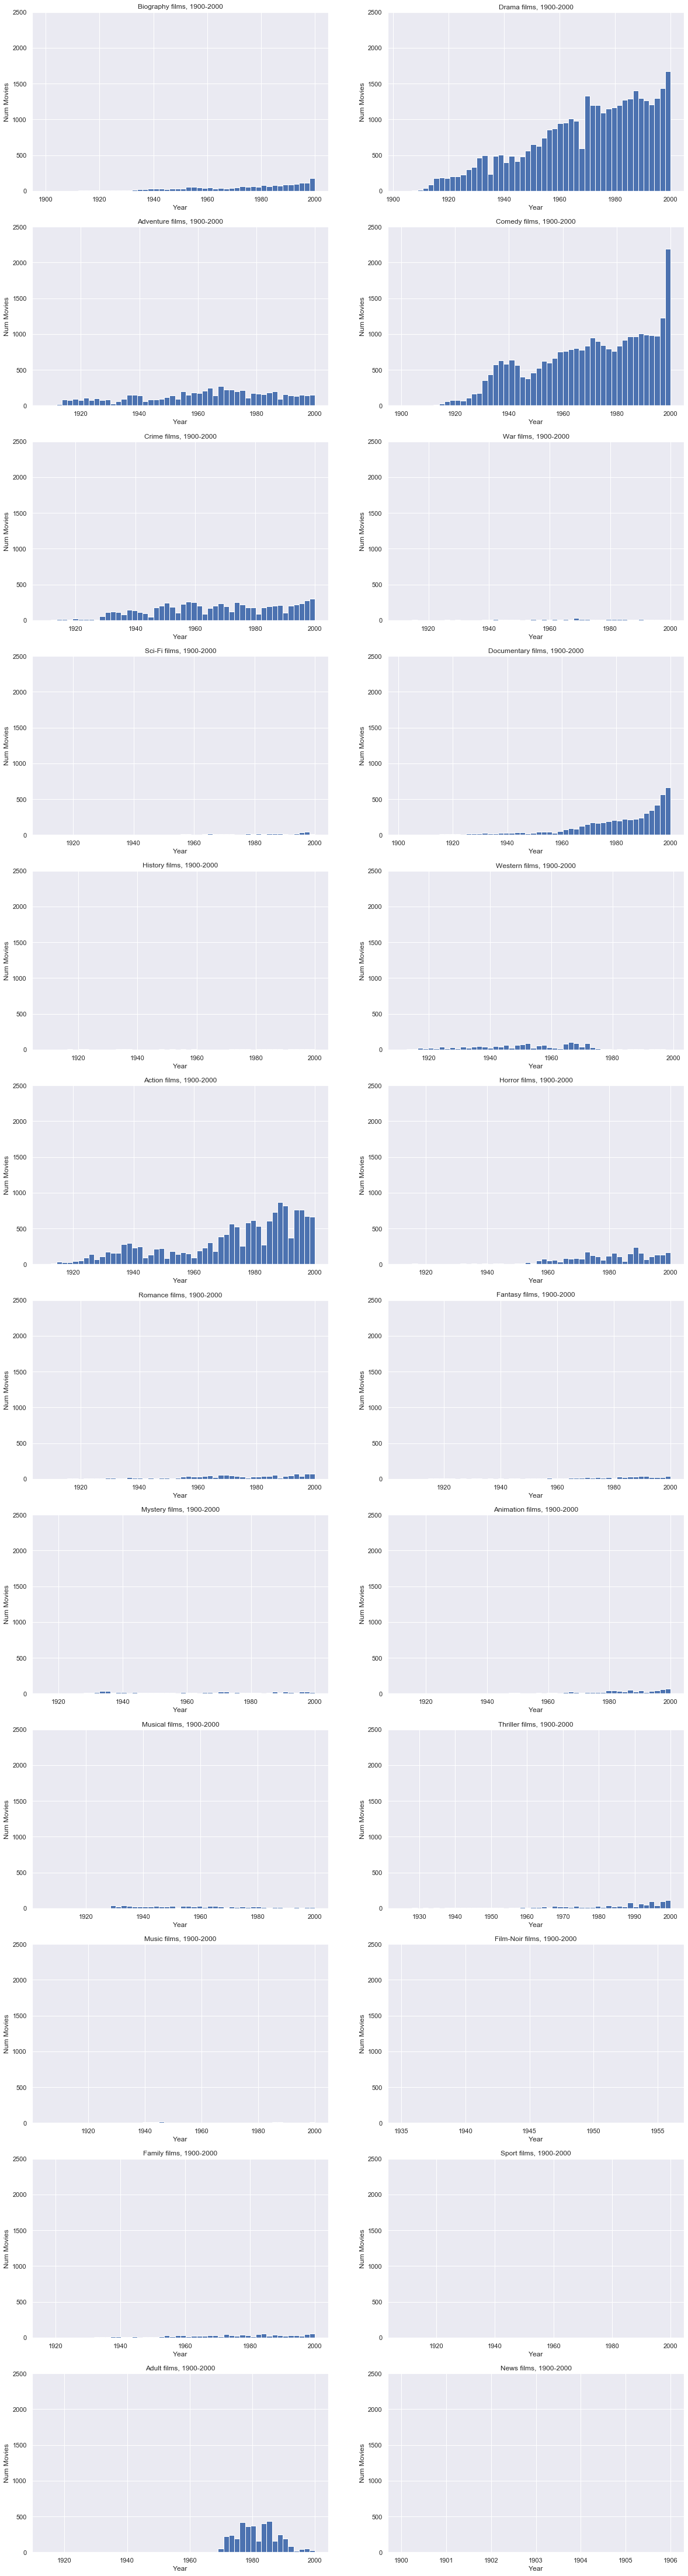

In [11]:
fig, ax = plt.subplots(12,2, figsize = (20,80))
ax = ax.reshape(12*2)

for i, g in enumerate(all_genres):
    genre_table = century.loc[century['genre1']== g] #create table of movies just matching specified genre
    ax[i].hist(genre_table['startYear'], bins=50)
    ax[i].set_title(g + " films, 1900-2000")
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Num Movies')

for a in ax:
    a.set_ylim(0,2500)
    
plt.show()

*Some interesting notes on the data reflected:* 
- Between 1900-2000 more Drama films were created than Comedy films. The number of Comedy films shoots up in the year 1999 surpassing the number of Drama films released that year by about 500. It would be interesting to continue into the 21$^{st}$ century and see how the genres have shifted.


- There is a slight dip in comedy films released following WWII. This could reflect the slight lull the movie industry experienced around this time. Assuming a movie takes a few years to make, production dipped during WWII, resulting in a drop in movies released soon after.


- Adult films have an interesting rise and decline in production from the 1970s-2000s. This trend could be attributed to the impact the 60s had on the film industry as attitudes surrounding sex drastically changed. The data reflects the relaxed restrictions of the 70s and 80s.

From the initial graphs of the genres above, I decided to look into a correlation between year and movies produced, as the movie count appears to be increasing consistently over the years.

In [12]:
top_4 = century['genre1'].value_counts()[:4].index
array_top4 = np.array([x for x in top_4])
print('The 4 most produced genres are: ', array_top4)

The 4 most produced genres are:  ['Drama' 'Comedy' 'Action' 'Crime']


**Drama, Comedy, Action, Crime**

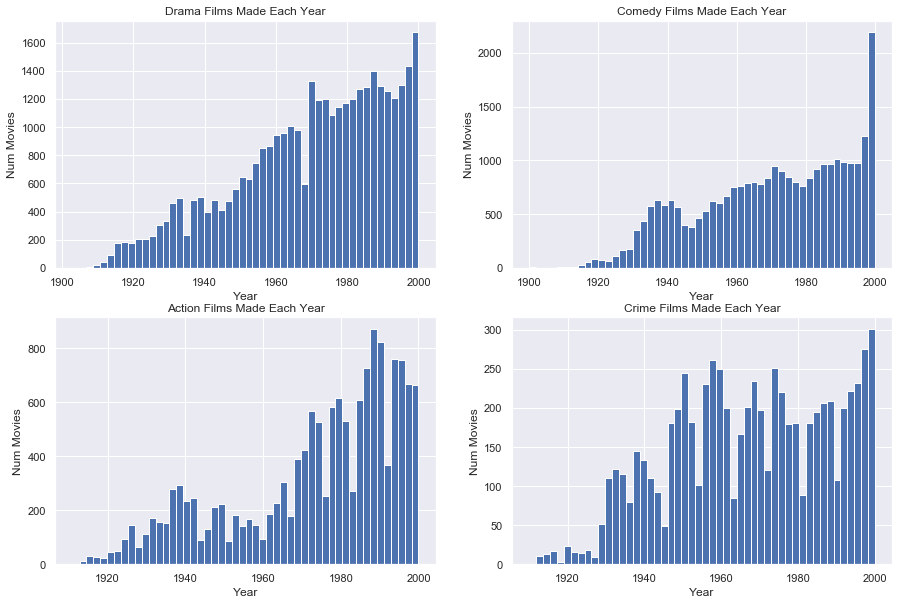

In [13]:
fig, ax = plt.subplots(2,2, figsize = (15, 10))
ax = ax.reshape(2*2)

for i, g in enumerate(array_top4):
    genre_table = century.loc[century['genre1']==g]
    ax[i].hist(genre_table['startYear'], bins=50)
    ax[i].set_title(str(g)+ ' Films Made Each Year')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Num Movies')

I had the idea that average review and number of reviews would be positively correlated becuase when people feel very passionately about a movie they are more likely to leave reviews.

The calculations and plots below disprove my theory.

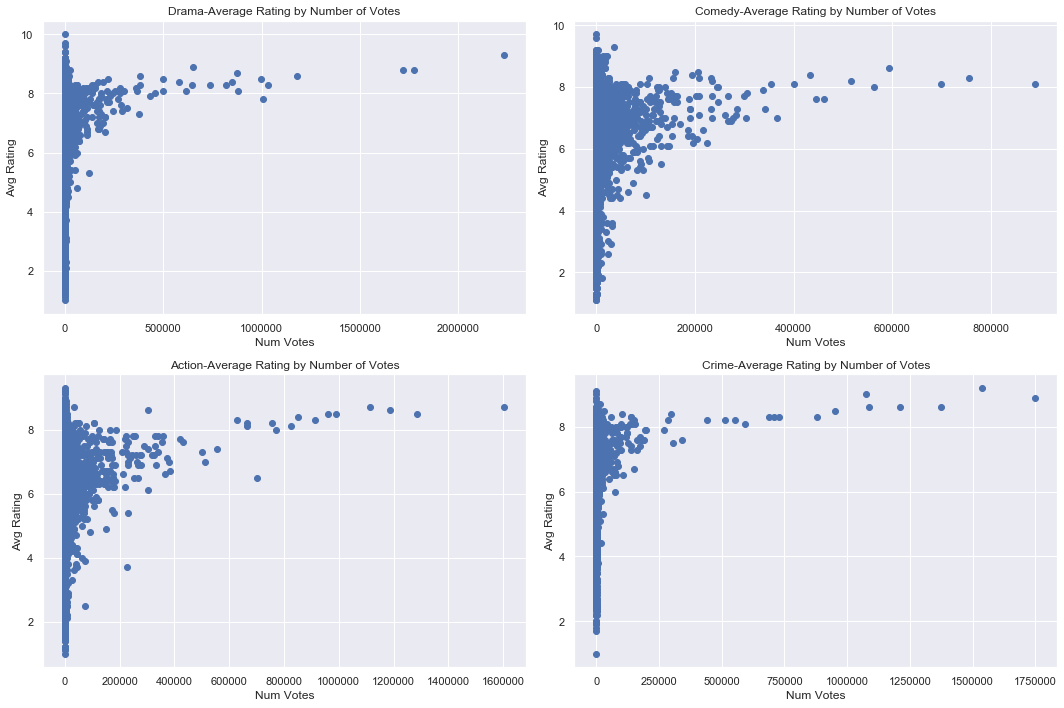

In [14]:
fig, ax = plt.subplots(2,2, figsize = (15, 10))
ax = ax.reshape(2*2)

total_corr = {}

for i, g in enumerate(array_top4):
    genre_table = century.loc[century['genre1']==g]
    ax[i].scatter(genre_table['numVotes'], genre_table['averageRating'])
    total_corr[g] = np.corrcoef(genre_table['numVotes'], genre_table['averageRating'])[0,1]
    ax[i].set_title(str(g) + '-Average Rating by Number of Votes')
    ax[i].set_xlabel('Num Votes')
    ax[i].set_ylabel('Avg Rating')
    
fig.tight_layout()

In [15]:
for key, value in total_corr.items():
    print('Correlation coefficient for ', key, ':', value)

Correlation coefficient for  Drama : 0.07982451890945054
Correlation coefficient for  Comedy : 0.10894970158283121
Correlation coefficient for  Action : 0.12765113960926713
Correlation coefficient for  Crime : 0.1546235407882753


Looking at the scatter plots above, it appears that there could be a positive correlation once the number of votes are extremely high. 

To explore this I focused on movies that have more than 100,000 reviews, and plotted the line calculated with linear regression. 

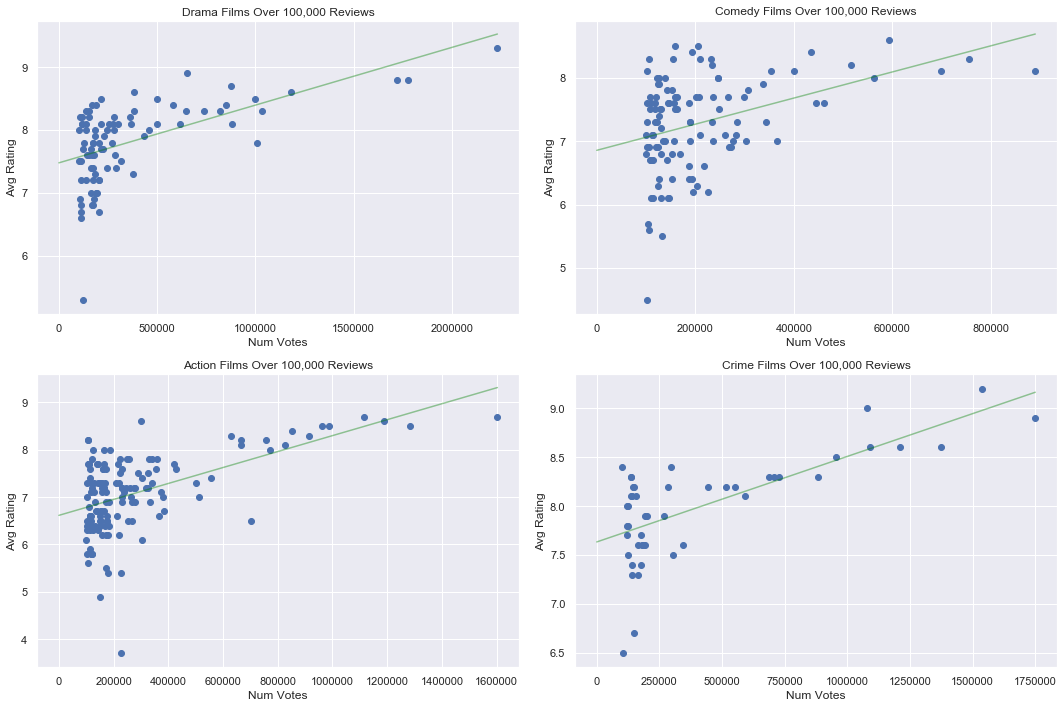

In [16]:
fig, ax = plt.subplots(2,2, figsize = (15, 10))
ax = ax.reshape(2*2)

max_corr = {}
scores = {}

for i, g in enumerate(array_top4):
    genre_table = century.loc[century['genre1']==g]
    top_genre = genre_table.loc[genre_table['numVotes']>100000]
    ax[i].scatter(top_genre['numVotes'], top_genre['averageRating'])
    model = LinearRegression().fit(top_genre[['numVotes']], top_genre['averageRating'])
    corrcoef = np.corrcoef(top_genre['numVotes'], top_genre['averageRating'])[0,1]
    max_corr[g] = corrcoef
    predict = model.score(top_genre[['numVotes']], top_genre['averageRating'])
    scores[g] = predict
    x = np.arange(0,top_genre['numVotes'].max(), 10)
    m = model.coef_
    b = model.intercept_
    ax[i].plot(x, m*x+b, color='green', alpha=.4)
    ax[i].set_title(str(g) + ' Films Over 100,000 Reviews')
    ax[i].set_xlabel('Num Votes')
    ax[i].set_ylabel('Avg Rating')
    
fig.tight_layout()

In [17]:
for key, value in max_corr.items():
    print('Correlation coefficient for', key, 'films with ratings above 100,000:', value)

Correlation coefficient for Drama films with ratings above 100,000: 0.5646260625020331
Correlation coefficient for Comedy films with ratings above 100,000: 0.3877894709861861
Correlation coefficient for Action films with ratings above 100,000: 0.5345422528798284
Correlation coefficient for Crime films with ratings above 100,000: 0.701541667978729


In [18]:
for key, value in scores.items():
    print('Coefficient of determination for', key, 'films with ratings above 100,000:', value)

Coefficient of determination for Drama films with ratings above 100,000: 0.31880259045655013
Coefficient of determination for Comedy films with ratings above 100,000: 0.150380673807746
Coefficient of determination for Action films with ratings above 100,000: 0.28573542011384245
Coefficient of determination for Crime films with ratings above 100,000: 0.49216071191037736


There appears to be a slight correlation between number of reviews and rating with the Drama and Action genres, and a strong correlation with Crime films, when there are over 100,000 reviews. The coefficient of determination does not indicate that the Linear Regression model is a particularly strong model. The Crime genre is the most strongly correlated as the model accounts for almost 50% of variation.

Drama increased from 0.0798 to 0.5646, Comedy from 0.1089 to 0.3878, Action from 0.1276 to 0.5345, and Drama from 0.1546 to 0.7015.

To put this information in context, below are the top films in each category that appear in the plots above. 

In [19]:
for g in array_top4:
    table = century.loc[century['genre1']==g]
    id_max = table['numVotes'].idxmax()
    ratings = table.loc[id_max]['numVotes']
    film = table.loc[id_max]['primaryTitle']
    print(g, '-', film, 'with', format(ratings, ','), 'ratings')

Drama - The Shawshank Redemption with 2,232,039 ratings
Comedy - The Truman Show with 889,722 ratings
Action - The Matrix with 1,602,711 ratings
Crime - Pulp Fiction with 1,749,873 ratings


#### Screen Legends

In [20]:
top25.head()

,Unnamed: 0,nconst,primaryName,birthYear,deathYear,primaryProfession,rank,knownFor1,knownFor2,knownFor3,knownFor4
0,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous",5,tt0053137,tt0043044,tt0072308,tt0050419
1,1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack",20,tt0038355,tt0117057,tt0037382,tt0071877
2,2,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer",4,tt0034583,tt0036855,tt0038109,tt0038787
3,6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer",1,tt0043265,tt0040897,tt0034583,tt0033870
4,7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director",4,tt0078788,tt0070849,tt0068646,tt0047296


In [21]:
average_birth = top25['birthYear'].mean()
std_25 = top25['birthYear'].std()
print("Average year of birth:", round(average_birth, 2), ", standard deviation of birth years:", round(std_25,2))

Average year of birth: 1911.27 , standard deviation of birth years: 11.66


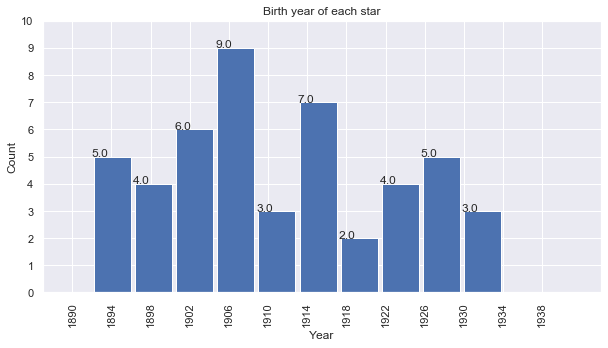

In [22]:
plt.figure(figsize=(10,5))
count, bins, v = plt.hist(top25['birthYear'], rwidth=.9)
plt.xlim(top25['birthYear'].min()-5, top25['birthYear'].max()+10)
plt.ylim(0,10)
plt.yticks(range(11))
plt.xticks(range(1890,1942,4), rotation=90)
for i, z in zip(count,bins):
    plt.annotate(i, (z,i))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title("Birth year of each star")
plt.show()

Those classified as screen legends in the list published in 1999 were born before 1935. This makes sense as each actor must have sufficient time to establish themselves as a screen legend.

#### Male vs. Female
I hypothesize that women make more movies when they are younger, and men have careers that continue later into their lives. I believe this trend to still be relevant, as famous male actors act well into their old age while there are only a few female actresses who act into their 60s (i.e. Meryl Streep, Judy Dench). To explore this hypothesis I split male and female stars into two separate tables. I then iterated through each individual in their respective gender table to identify the number of films made each year by this individual. I then selected the most recent year where the actor produced his or her maximum amount of films. For example, if Fred Astaire made 4 movies in 1950, 1951, and 1952, then fewer than 4 films every year until his passing, I am interested in the year 1952. I then subtracted the birth year of Fred Astaire to generate the age at which he had his last busiest year.

The plots show that from these 48 stars, men work later in their lives and women start earlier. 

This information is generated from only 48 individuals, but still produces the graph that I would expect as the age of male and female actors increases. 

In [23]:
men = top25[top25['primaryProfession'].str.contains('actor')]
women = top25[top25['primaryProfession'].str.contains('actress')]

In [24]:
men_lastbest = []

for index, row in men.iterrows():
    birth = row['birthYear'] 
    table = principals.loc[principals['nconst']==row['nconst']] # create a new table where the name constant matches
    last_best_year = table['startYear'].value_counts().idxmax() # find the last year the actor was most busy
    men_lastbest.append(last_best_year-birth) # subtract the birth from the year of production to get the age

In [25]:
women_lastbest = []
for index, row in women.iterrows():
    birth = row['birthYear']
    table = principals.loc[principals['nconst']==row['nconst']]
    last_best_year = table['startYear'].value_counts().idxmax()
    women_lastbest.append(last_best_year-birth)

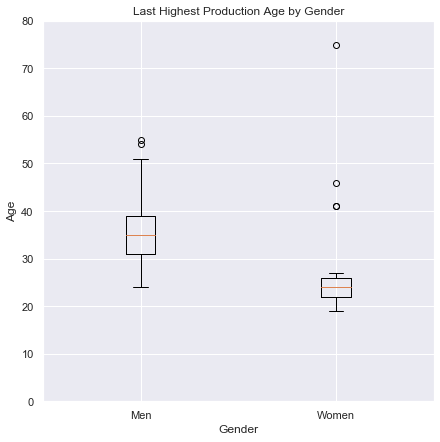

In [26]:
plt.figure(figsize=(7,7))
plt.boxplot([men_lastbest, women_lastbest])
plt.gca().set_xticklabels(['Men', 'Women'])
plt.ylim(0,80)
plt.ylabel('Age')
plt.xlabel('Gender')
plt.title('Last Highest Production Age by Gender')
plt.show()

In [27]:
mean_men = men['birthYear'].mean()
std_men = men['birthYear'].std()

mean_women = women['birthYear'].mean()
std_women = women['birthYear'].std()

print("Mean male age:", mean_men, ", std of male age:", std_men)

print("Mean female age:", mean_women, " std of women age:", std_women)

Mean male age: 1909.0 , std of male age: 10.330889251524901
Mean female age: 1913.36  std of women age: 12.612427733522729


The graph below shows the ages at which each actor made his or her films. This graph illustrates the same trend demonstrated in the box plot above. Women start earlier and the number of films made drops around their 40s. Male actors start later and continue making more films into their 60s.

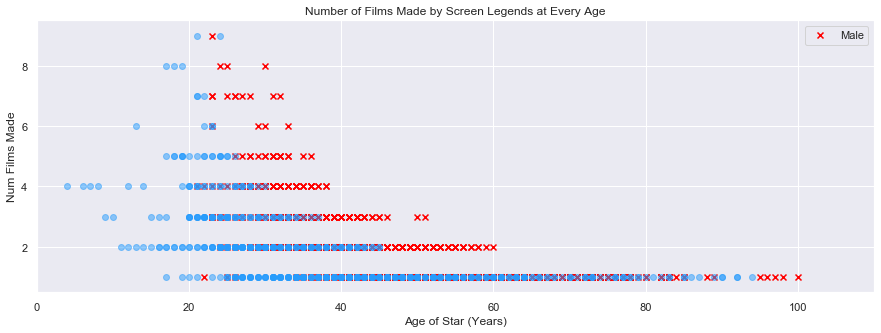

In [28]:
plt.figure(figsize=(15,5))

for index, row in men.iterrows():
    birth = row['birthYear']
    table = principals.loc[principals['nconst'] == row['nconst']]
    plt.scatter(table['startYear'].unique()-birth, table['startYear'].value_counts(), color='red', marker='x')
    plt.xlim(0,100)
    
for index, row in women.iterrows():
    birth = row['birthYear']
    death = row['deathYear']
    table = principals.loc[principals['nconst'] == row['nconst']]
    plt.scatter(table['startYear'].unique()-birth, table['startYear'].value_counts(), color='#279CFD', alpha=.5)
    plt.xlim(0,110)

plt.title('Number of Films Made by Screen Legends at Every Age')
plt.xlabel('Age of Star (Years)')
plt.ylabel('Num Films Made')
plt.legend(labels=['Male'])
plt.show()

There are popular pairings in Classic Hollywood. The plots below show the number of movies each star starred in with another actor on the top 50 list. The pairings of Fred Astaire and Ginger Rogers, Katharine Hepburn and Spencer Tracy, and Clark Gable and Joan Crawford are all reflected in the graphs below.

In [29]:
star_ids = top25['nconst'].values
actor_movies = {} # holds initial actor and movies that actor was in

for s in star_ids:
    table = principals.loc[principals['nconst']==s]
    actor_movies[s] = table['tconst'].values

In [30]:
# iterate through first actor - will compare remaining actors to the selected one
actor_comparisons = {} #empty dictionary will hold actor1 as key and values will be a dictionary 

for actor1, movie_list1 in actor_movies.items():
    actor_comparisons[actor1] = {} # initialize empty dictionary to hold actor2 and films in common 
    #compare movies of the remaining actors to the movies of selected actor 
    for actor2, movie_list2 in actor_movies.items():
        #check comparison is not same actor
        if actor2 != actor1:
            same = set(movie_list1) & set(movie_list2)
            if len(same) > 0: # if they shared movies
                actor_comparisons[actor1][actor2] = same # insert into dictionary


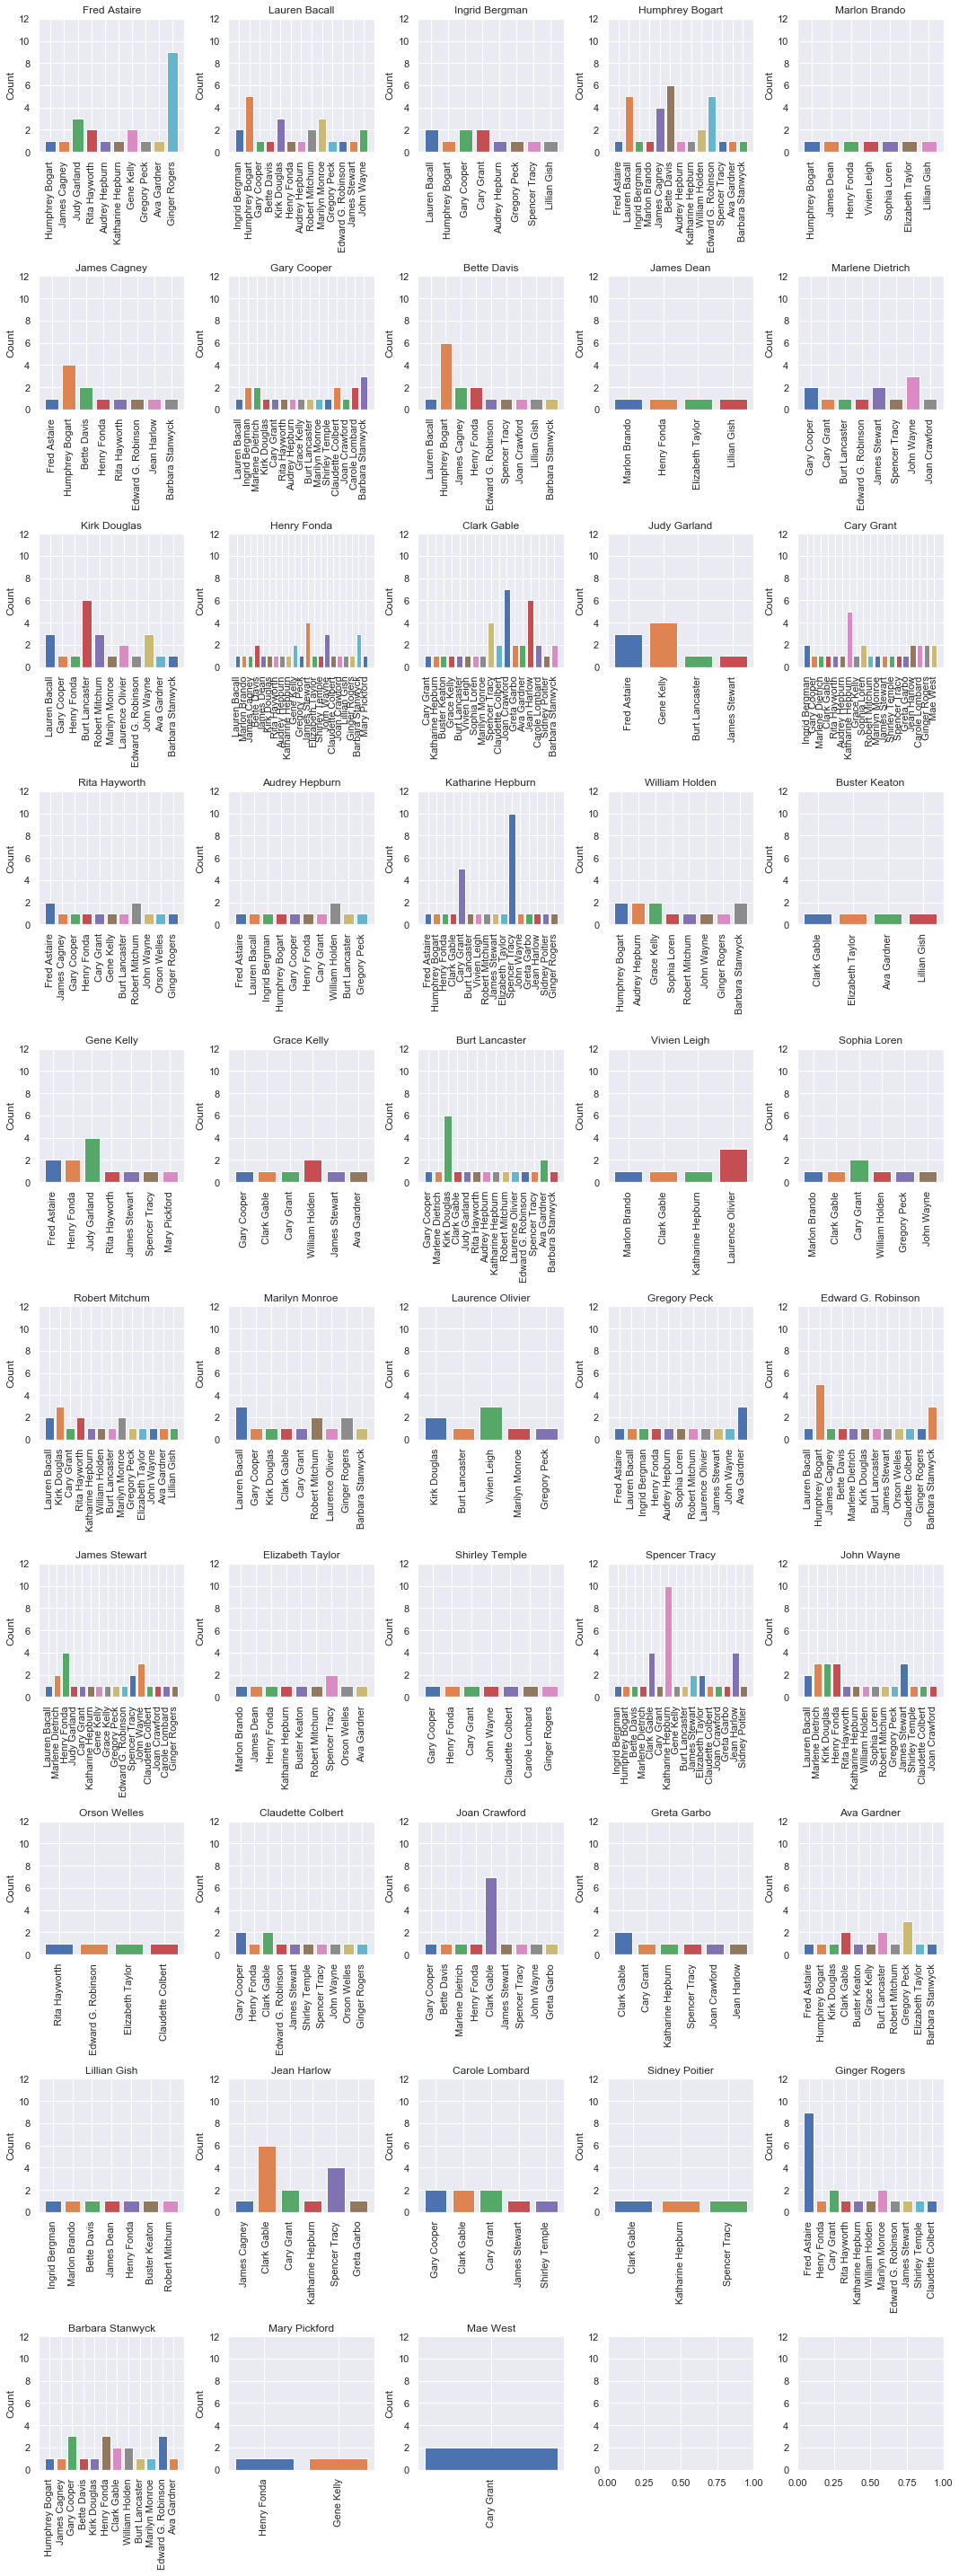

In [31]:
fig, ax = plt.subplots(10, 5, figsize=(15,40))
ax = ax.reshape(5*10)

for i, (actor1, d) in enumerate(actor_comparisons.items()):
    actor2_english = []
    for actor2, titles in d.items():
        actor1_name = top25.loc[top25['nconst']==actor1]['primaryName'].values[0]
        actor2_name = top25.loc[top25['nconst']==actor2]['primaryName'].values[0]
        actor2_english.append(actor2_name)
        ax[i].bar(actor2_name, len(titles))
        ax[i].set_title(actor1_name)
    ax[i].set_ylabel('Count')
    ax[i].set_xticklabels(actor2_english, rotation=90)

for a in ax:
    a.set_ylim(0,12)

fig.tight_layout()

I explored the correlation between the number of films an actor made every year with every other actor's films. My hypothesis was that Hepburn and Tracy would have high correlations, as they frequently collaborated on projects and had a decades long affair.

Below, I plot the correlation of all actors with respect to Fred Astaire and Katharine Hepburn, expecting to see their frequent collaborators with a fairly high correlation.

In [32]:
new_df = pd.DataFrame({})

for const in top25['nconst']:
    name = top25.loc[top25['nconst']==const]['primaryName'].values[0]
    table = principals.loc[principals['nconst']==const]
    counts = table['startYear'].value_counts()
    new_df[name] = counts

new_df = new_df.fillna(0)

correlation_all = new_df.corr(method='spearman')

In [33]:
katharine = np.array(correlation_all["Katharine Hepburn"])
names = np.array(correlation_all.columns)
idx = np.argsort(katharine)
idx = idx[::-1]

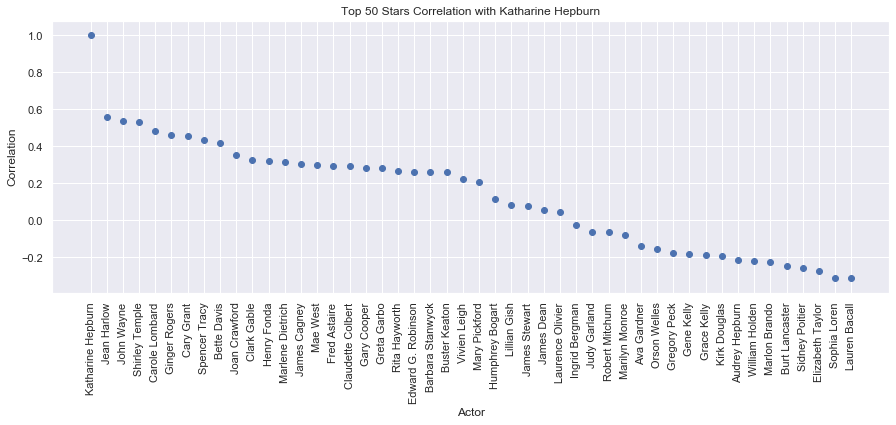

In [34]:
plt.figure(figsize=(15,5))
plt.scatter(names[idx], katharine[idx])
plt.xticks(rotation=90)
plt.title("Top 50 Stars Correlation with Katharine Hepburn")
plt.ylabel('Correlation')
plt.xlabel('Actor')
plt.show()

In [35]:
k = top25.loc[top25['primaryName']=="Katharine Hepburn"].index[0]
jean = top25.loc[top25['primaryName']=="Jean Harlow"].index[0] # strongly correlated
w = top25.loc[top25['primaryName']=="John Wayne"].index[0] # strongly correlated
l = top25.loc[top25['primaryName']=="Lauren Bacall"].index[0] # weakly correlated
s = top25.loc[top25['primaryName']=="Sophia Loren"].index[0] # weakly correlated

top25.loc[[k, jean, w, s, l]][['primaryName', 'birthYear']]

,primaryName,birthYear
17,Katharine Hepburn,1907
41,Jean Harlow,1911
34,John Wayne,1907
24,Sophia Loren,1934
1,Lauren Bacall,1924


Note the birth years of those most highly correlated (Jean Harlow, John Wayne) and the birth years of those lowest correlated with Katharine Hepburn (Sophia Loren, Lauren Bacall). 

In [36]:
fred = np.array(correlation_all["Fred Astaire"])
names = np.array(correlation_all.columns)
idx = np.argsort(fred)
idx = idx[::-1]

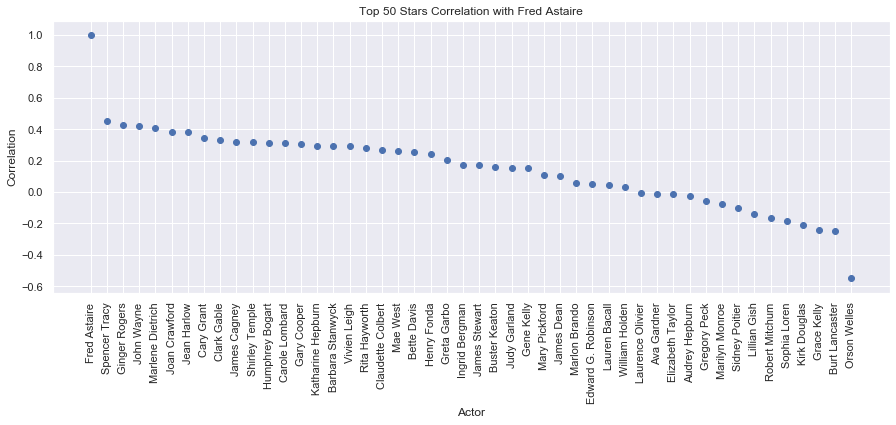

In [37]:
plt.figure(figsize=(15,5))
plt.scatter(names[idx], fred[idx])
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.xlabel('Actor')
plt.title("Top 50 Stars Correlation with Fred Astaire")
plt.show()

In [38]:
f = top25.loc[top25['primaryName']=="Fred Astaire"].index[0]
s = top25.loc[top25['primaryName']=="Spencer Tracy"].index[0] # strongly correlated
g = top25.loc[top25['primaryName']=="Ginger Rogers"].index[0] # strongly correlated
j = top25.loc[top25['primaryName']=="John Wayne"].index[0] # strongly correlated

o = top25.loc[top25['primaryName']=="Grace Kelly"].index[0] # weakly correlated
b = top25.loc[top25['primaryName']=="Burt Lancaster"].index[0] # weakly correlated

top25.loc[[f,s,g, j, o,b]][['primaryName', 'birthYear']]

,primaryName,birthYear
0,Fred Astaire,1899
33,Spencer Tracy,1900
44,Ginger Rogers,1911
34,John Wayne,1907
21,Grace Kelly,1929
22,Burt Lancaster,1913


Note the birth years of those most highly correlated and those lowest correlated with Fred Astaire. I expected Ginger Rogers to be correlated with Fred Astaire as they made 10 films together.

These findings did not support my hypothesis that the careers of popular pairings are correlated, but I had an inclination that careers have a relationship with others from the same time period. It seems that when an actor is doing, others of the same demographic are doing similarly well. 

To explore this further I plotted the youngest individual on the list who is still alive (her death year is 2020 for computational purposes).

In [39]:
sophia = np.array(correlation_all["Sophia Loren"])
names = np.array(correlation_all.columns)
idx = np.argsort(sophia)
idx = idx[::-1]

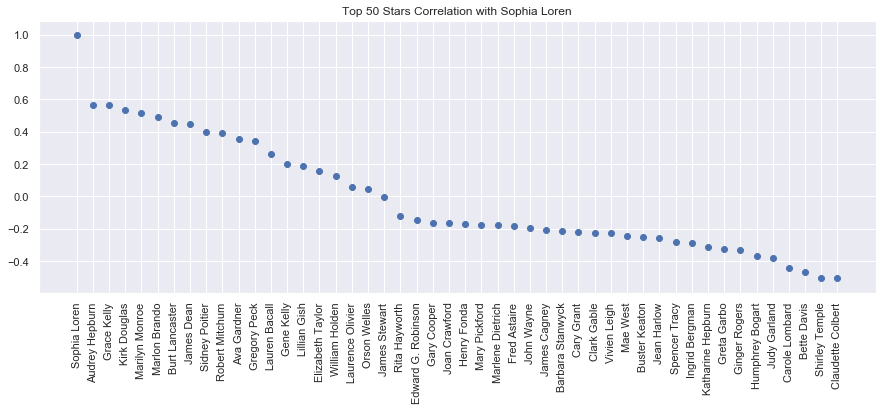

In [40]:
plt.figure(figsize=(15,5))
plt.scatter(names[idx], sophia[idx])
plt.xticks(rotation=90)
plt.title('Top 50 Stars Correlation with Sophia Loren')
plt.show()

In [41]:
s = top25.loc[top25['primaryName']=="Sophia Loren"].index[0]
a = top25.loc[top25['primaryName']=="Audrey Hepburn"].index[0]
g = top25.loc[top25['primaryName']=="Grace Kelly"].index[0] # strongly correlated
c = top25.loc[top25['primaryName']=="Claudette Colbert"].index[0] # negatively correlated

top25.loc[[s, a, g, c]][['primaryName', 'birthYear']]

,primaryName,birthYear
24,Sophia Loren,1934
16,Audrey Hepburn,1929
21,Grace Kelly,1929
36,Claudette Colbert,1903


## Movie Length

An initial view of runtime by year did not indicate a strong relationship, I noticed an increase in runtime between the movies from 1900 to now. Below I explore if the data from the past century reflects this theory.

In [42]:
copy = century.copy().replace('\\N', np.NaN)

In [43]:
copy['runtimeMinutes'] = pd.to_numeric(copy['runtimeMinutes'])

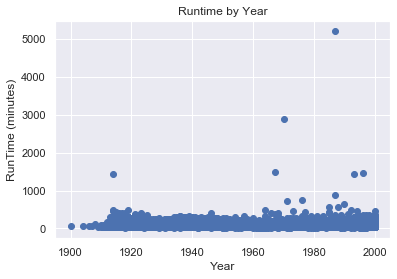

In [44]:
plt.scatter(copy['startYear'], copy['runtimeMinutes'])
plt.xlim()
plt.xlabel('Year')
plt.ylabel('RunTime (minutes)')
plt.title('Runtime by Year')
plt.show()

In [45]:
long_movies = copy.loc[copy['runtimeMinutes']>2000]
long_movies

,Unnamed: 0,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genre1,genre2,genre3,averageRating,numVotes
96007,96007,tt0284020,movie,The Cure for Insomnia,1987,5220.0,Documentary,Music,NaN,5.1,343
100932,100932,tt0342707,movie,The Longest Most Meaningless Movie in the World,1970,2880.0,Documentary,Drama,History,5.6,172


The incredibly high data points are not errors, there is in fact an 87 hour long experimental film.

In [46]:
cent = np.arange(1910,2001)
# the STD is null for years before 1910, so I removed these columns for the purposes of my evaluation below

def find_avg_runtime(years):
    final_std = []
    final_avg = []
    for y in years:
        table = copy.loc[century['startYear']==y]
        final_avg.append(table['runtimeMinutes'].mean())
        final_std.append(table['runtimeMinutes'].std())
    return (np.array(final_avg), np.array(final_std))


average_runtime,  std_runtime = find_avg_runtime(cent)

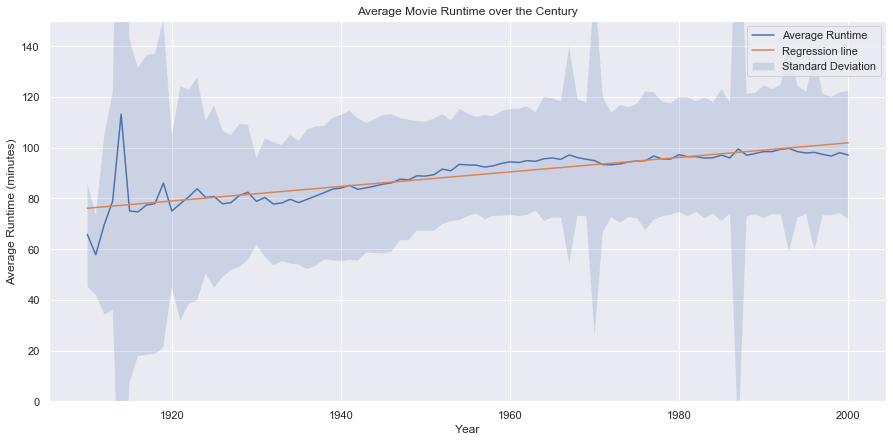

Slope: 0.28649866986756484


In [47]:
plt.figure(figsize=(15,7))
plt.plot(cent, average_runtime, label='Average Runtime')
plt.fill_between(cent, average_runtime-std_runtime, average_runtime+std_runtime, alpha=.2, label='Standard Deviation')
model = LinearRegression().fit(cent.reshape(-1,1), average_runtime)
b = model.intercept_
m = model.coef_
x = cent
y = m*x+b
plt.plot(x,y, label='Regression line')
plt.ylim(0,150)
plt.xlabel("Year")
plt.ylabel("Average Runtime (minutes)")
plt.title('Average Movie Runtime over the Century')
plt.legend()
plt.show()

print('Slope:', m[0])

This plot demonstrates that average movie length changes by ~30 seconds every year. Both the Pearson correlation and Spearman correlation imply that there is a strong relationship between average runtime and year.

In [48]:
print('Correlation:', np.corrcoef(cent, average_runtime)[0,1])
print('Spearman correlation', spearmanr(cent, average_runtime).correlation)

Correlation: 0.8263303265997753
Spearman correlation 0.9006051919095397


After identifying a seemingly strong correlation it is necessary to investigate whether this relationship resulted by  chance using a permutation test with 10,000 samples. 

In [49]:
def permute_y(column):
    ys = np.random.permutation(column.copy())
    return ys

In [50]:
c_slopes = np.zeros(10000)
spearman_slopes = np.zeros(10000)

for i in range(len(c_slopes)):
    x = permute_y(average_runtime)
    c_slopes[i] = np.corrcoef(cent, x)[0,1]
    spearman_slopes[i] = spearmanr(cent, x).correlation

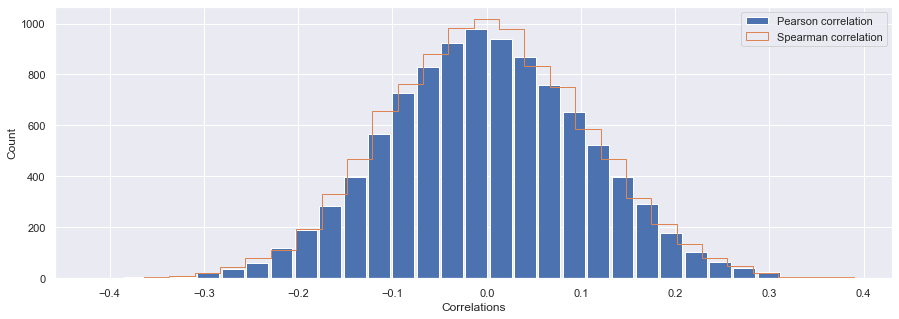

Pearson correlation: 0.8263303265997753
Spearman correlation 0.9006051919095397


In [51]:
plt.figure(figsize=(15,5))
plt.hist(c_slopes, rwidth=.9, bins=30, label='Pearson correlation')
plt.hist(spearman_slopes, rwidth=.9, bins=30, histtype='step', label='Spearman correlation')
plt.xlabel('Correlations')
plt.ylabel('Count')
plt.legend()
plt.show()

print('Pearson correlation:', np.corrcoef(cent, average_runtime)[0,1])
print('Spearman correlation', spearmanr(cent, average_runtime).correlation)

Considering that both the Pearson correlation and Spearman correlations calculated from the data are significantly higher than the correlations calculated from 10,000 samples above, I am confident that the relationship between average runtime and year did not result from chance. 

## Conclusion 

I am moderately confident in my findings relating to ages in Hollywood. This data was generated from a sample of 48 individuals so it is unreasonable to use these findings as proof of the culture of Hollywood. From reading and observation over the years I do believe that this trend is indicative of how Hollywood has always been. There are contemporary pieces that discuss the difficulties of being an older woman in Hollywood, and coupled with the data presented in this report I am moderately that these results reflect a genuine trend. 

I am moderately confident in my conclusion that number of reviews is positively correlated with average rating, once the number of reviews is incredibly high. It is important to acknowledge other databases that hold reviews, such as Rotten Tomatoes, and I would be curious to see if the observed trend is consistent between sources. 

I expected WWII to have more of an impact on films, but I would continue to look into revenue from movies during certain time periods before drawing a conclusion of the effect of major events on the industry. I assume the current pandemic will have a devastating effect on the film industry, despite efforts to make new releases available at home. Looking into revenue seems like the most direct way to view the effect of events on films, as the number of films created alone is not indicative of the time period. 

#### Acknowledgments 
- After I gathered all my data and spent a time digging, my brother listened and provided feedback. Talking allowed me to generate ideas for deeper investigations into the data.
- The use of [subplots](https://www.mathworks.com/help/matlab/ref/subplot.html): 
    - https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html
    - https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html
- The use of [annotate](https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)
- [Stackoverflow](https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size) on figure(figsize=(#,#))
- [Seaborn](https://seaborn.pydata.org/) 